# Visualise words and letters as colours 

In [1]:
from string import ascii_letters as letters 
import numpy as np 

nums = np.arange(1, 27)
low_case = letters[:26]

l2n = {l:n for l,n in zip(low_case,nums)}
print(l2n)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [2]:
with open("words_alpha.txt", 'r') as words_file:
    word_list = words_file.readlines()

word_list = [w.strip('\n').replace("'","").lower() for w in word_list]

words_by_len = {}
for w in word_list:
    l = len(w)
    if l in words_by_len:
        words_by_len[l].append(w)
    else:
        words_by_len[l] = [w]


## This goes down the letters to a single colour idea route

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')
np.random.seed(1)

word_length = 5 
num_words = 5
ws = np.random.choice(words_by_len[word_length], num_words)

arr = np.zeros((word_length, num_words))
for idx, w in enumerate(ws):
    arr[idx] =  [l2n[l] for l in w] 
arr


/usr/local/Caskroom/miniforge/base/envs/playground/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[19., 20.,  9., 12., 12.],
       [19.,  8.,  5., 12., 12.],
       [19.,  5., 14., 19.,  5.],
       [ 2., 12.,  1.,  3., 11.],
       [ 3., 15.,  1., 19., 20.]])

In [4]:
ws

array(['still', 'shell', 'sense', 'black', 'coast'], dtype='<U5')

<AxesSubplot:>

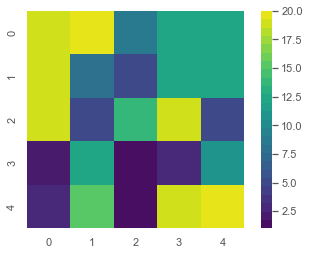

In [5]:
cmap = sns.color_palette("viridis", 26)
sns.heatmap(arr, cmap=cmap, square=True)

### What if we think of this more like a frequency problem

In [6]:
exp = np.random.exponential(size=1000)
exp = exp/exp.max()
exp_scaled = np.around(exp*999).astype('int')
sampled_words = np.array(word_list)[exp_scaled]

longest_word = np.max([len(w) for w in sampled_words])

arr = np.zeros( (len(sampled_words), longest_word)  )
for idx, w in enumerate(sampled_words):
    arr[idx, 0:len(w)] =  [l2n[l] for l in w] 

<AxesSubplot:>

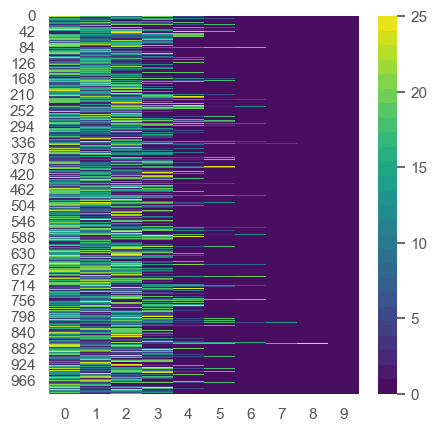

In [7]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=100)
sns.heatmap(arr, cmap=cmap, ax=ax)

## Single word to colour idea

In [8]:
np.random.seed(1)

word_length = 5 
num_words = 5
ws = np.random.choice(words_by_len[word_length], num_words)

arr = np.zeros((word_length, num_words))
for idx, w in enumerate(ws):
    arr[idx] =  [l2n[l] for l in w] 
arr

array([[19., 20.,  9., 12., 12.],
       [19.,  8.,  5., 12., 12.],
       [19.,  5., 14., 19.,  5.],
       [ 2., 12.,  1.,  3., 11.],
       [ 3., 15.,  1., 19., 20.]])